<h1>Вторник</h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv('adult.data', names=['age', 'workclass', 'fnlwg', 'education', 
                                        'education-num','marital-status', 'occupation', 
                                        'relationship', 'race', 'sex', 'capital-gain', 
                                        'capital-loss', 'hours-per-week', 'native-country', 'smth'])
data.head()

,age,workclass,fnlwg,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,smth
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


<h3>1. How many males and females are there?</h3>

In [9]:
data['sex'].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

<h3>2. What is the mean male age?</h3>

In [20]:
male_age = data.groupby('sex')['age'].mean()[1]
print(f'Mean male age is {male_age}')

Mean male age is 39.43354749885268


<h3>3. What is the proportion of the US citizens?</h3>

In [34]:
prop = data['native-country'].value_counts(normalize=True)[0] # индекс 0 отвечает США
print(f'Proportion of US citizens is {prop}')

Proportion of US citizens is 0.895857006848684


<h3>4. Plot the distribution of people’s education as a bar plot.</h3>

<BarContainer object of 16 artists>

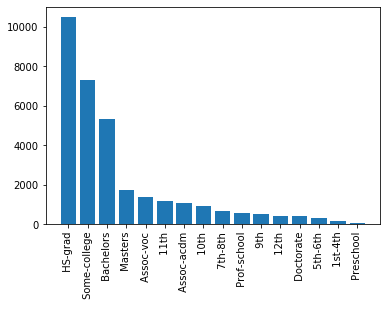

In [46]:
plt.xticks(rotation=90)
plt.bar(data['education'].value_counts().index, 
        data['education'].value_counts().values)

<h3>5. What is the mean and standard deviation of the ”final weight” for divorced people?</h3>

In [67]:
mn = data[data['marital-status'] == ' Divorced']['fnlwg'].mean()
stddev = data[data['marital-status'] == ' Divorced']['fnlwg'].std()
print(f'Mean is {mn}\nStandart deviation is {stddev}')

Mean is 185802.79045689848
Standart deviation is 105646.78945933598


<h3>6. Is it true that the people who receive over 50k are mostly highly educated?</h3>

In [74]:
data[data['smth'] == ' >50K']['education'].value_counts(normalize=True) # => that's true

 Bachelors       0.283255
 HS-grad         0.213621
 Some-college    0.176891
 Masters         0.122306
 Prof-school     0.053947
 Assoc-voc       0.046040
 Doctorate       0.039026
 Assoc-acdm      0.033797
 10th            0.007907
 11th            0.007652
 7th-8th         0.005101
 12th            0.004209
 9th             0.003443
 5th-6th         0.002041
 1st-4th         0.000765
Name: education, dtype: float64

<h3>7. What is the maximum male and female age for each race?</h3>

In [79]:
data.groupby(['race', 'sex'])['age'].max()

race                 sex    
 Amer-Indian-Eskimo   Female    80
                      Male      82
 Asian-Pac-Islander   Female    75
                      Male      90
 Black                Female    90
                      Male      90
 Other                Female    74
                      Male      77
 White                Female    90
                      Male      90
Name: age, dtype: int64

<h3>8. The people from which countries work as farmers/fishers?</h3>

In [82]:
data[data['occupation'] == ' Farming-fishing']['native-country'].value_counts()

 United-States    879
 Mexico            77
 ?                  5
 Puerto-Rico        5
 Philippines        4
 Guatemala          4
 Vietnam            2
 Cuba               2
 Canada             2
 Italy              2
 El-Salvador        2
 Germany            1
 Yugoslavia         1
 Portugal           1
 France             1
 Cambodia           1
 England            1
 Ireland            1
 Japan              1
 Hong               1
 Poland             1
Name: native-country, dtype: int64

<h3>9. Consider the ratio of the number of 1) male bachelors to male masters, and 2) female
bachelors to female masters. Which one is higher?</h3>

In [106]:
male_b = data[(data['education'] == ' Bachelors') & (data['sex'] == ' Male')].shape[0]
male_m = data[(data['education'] == ' Masters') & (data['sex'] == ' Male')].shape[0]

female_b = data[(data['education'] == ' Bachelors') & (data['sex'] == ' Female')].shape[0]
female_m = data[(data['education'] == ' Masters') & (data['sex'] == ' Female')].shape[0]

print(f'ratio for men is {male_b / male_m}\nratio for women is {female_b / female_m}')

ratio for men is 3.14743049705139
ratio for women is 3.0205223880597014


<h3>10. What is the largest number of hours a person works a week? How many people who work
this number of hours are there? What is their income?</h3>

In [122]:
largest = data['hours-per-week'].max()
people = data[data['hours-per-week'] == largest]

print(f'Largest number of hours per week is {largest}')
print(f'There are {people.shape[0]} people woking that hard')
print('That much people have their income:')
print(people['smth'].value_counts())

Largest number of hours per week is 99
There are 85 people woking that hard
That much people have their income:
 <=50K    60
 >50K     25
Name: smth, dtype: int64
